In [29]:
from model.prsnet.lightning_prsnet import LightingPRSNet
import matplotlib.pyplot as plt
import os
import pandas as pd

In [30]:
"modelos_interesantes/remote_test/lightning_logs"

['version_13',
 'version_8',
 'version_19',
 'version_14',
 'version_12',
 'version_10',
 'version_1',
 'version_17',
 'version_15',
 'version_5',
 'version_24',
 'version_7',
 'version_16',
 'version_20',
 'version_21',
 'version_22',
 'version_11',
 'version_3',
 'version_0',
 'version_18',
 'version_4',
 'version_23',
 'version_9',
 'version_6',
 'version_2']

In [63]:
def plot_metric(version, path_to_metric_file, ax, x, y):
    if not os.path.exists(path_to_metric_file):
        return
    
    data = pd.read_csv(path_to_metric_file)
    if not y in data.columns:
        return
    data = data[[x, y]].dropna()
    data = data.rename(columns={y : str(y) +"_"+ str(version)})
    data.plot(ax = ax, kind="line", x=x, y=str(y) +"_"+ str(version))

In [71]:
def plot_results(folder_root):
    versiones = os.listdir(folder_root)
    fig, axes = plt.subplots(4, figsize=(10,10))
    axes = axes.flatten()
    ys = ["train_phc", "val_phc", "train_loss", "val_loss"]
    xs = ["epoch"]
    for j, y in enumerate(ys):
        for i, version in enumerate(versiones):
            vpath = os.path.join(
                folder_root,
                version,
                "metrics.csv"
            )
            plot_metric(version, vpath, axes[j], xs[0], y)
  

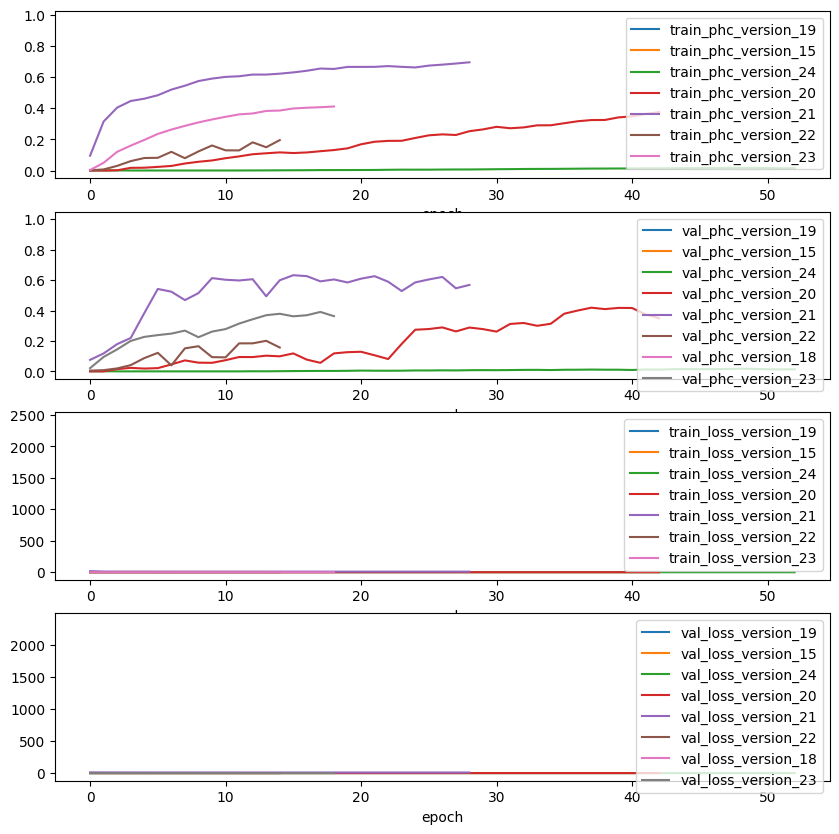

In [73]:
plot_results("modelos_interesantes/remote_test/lightning_logs")